In [ ]:
import kagglehub
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import os


path = kagglehub.dataset_download("blastchar/telco-customer-churn")
print("Path to dataset files:", path)


Using Colab cache for faster access to the 'telco-customer-churn' dataset.
Path to dataset files: /kaggle/input/telco-customer-churn


In [ ]:

files = os.listdir(path)
csv_file = [f for f in files if f.endswith(".csv")][0]   # pick the CSV file

full_path = os.path.join(path, csv_file)


saldf = pd.read_csv(full_path)
print("Dataset Loaded Successfully!")


print("\nFIRST 5 ROWS OF DATASET:\n")
print(saldf.head())


Dataset Loaded Successfully!

FIRST 5 ROWS OF DATASET:

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  Tech

In [ ]:

saldf["TotalCharges"] = pd.to_numeric(saldf["TotalCharges"], errors="coerce")

saldf["TotalCharges"].fillna(saldf["TotalCharges"].median(), inplace=True)


saldf["Churn"] = saldf["Churn"].map({"Yes": 1, "No": 0})


/tmp/ipython-input-1192593398.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  saldf["TotalCharges"].fillna(saldf["TotalCharges"].median(), inplace=True)


In [ ]:

inp = saldf[['MonthlyCharges', 'tenure', 'SeniorCitizen']]
out = saldf['Churn']


LR = LogisticRegression()
LR.fit(inp, out)

print("\nMODEL TRAINED SUCCESSFULLY!")



MODEL TRAINED SUCCESSFULLY!


In [ ]:
monthly_charges = float(input("Enter Monthly Charges (e.g., 29.85): "))
tenure = int(input("Enter Tenure (number of months, e.g., 1): "))
senior_citizen = int(input("Enter Senior Citizen (0=No, 1=Yes): "))

pred = LR.predict([[monthly_charges, tenure, senior_citizen]])

result = "Customer Will CHURN (Yes)" if pred[0] == 1 else "Customer Will NOT Churn (No)"

print("\nPrediction Result:", result)


Enter Monthly Charges (e.g., 29.85): 750
Enter Tenure (number of months, e.g., 1): 3
Enter Senior Citizen (0=No, 1=Yes): 0

Prediction Result: Customer Will CHURN (Yes)


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


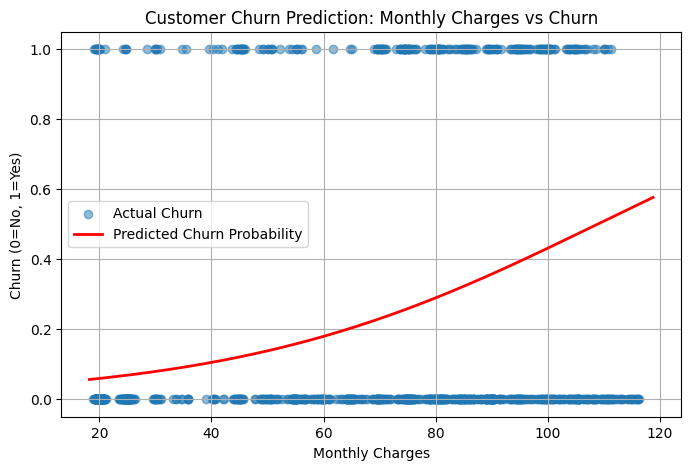

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.figure(figsize=(8,5))
plt.scatter(inp['MonthlyCharges'][:1000], out[:1000], alpha=0.5, label='Actual Churn')


monthly_charges_range = np.linspace(inp['MonthlyCharges'].min(), inp['MonthlyCharges'].max(), 500)

fixed_tenure = inp['tenure'].median()
fixed_senior_citizen = inp['SeniorCitizen'].median()


prediction_data = pd.DataFrame({
    'MonthlyCharges': monthly_charges_range,
    'tenure': [fixed_tenure] * len(monthly_charges_range),
    'SeniorCitizen': [fixed_senior_citizen] * len(monthly_charges_range)
})


predicted_probabilities = LR.predict_proba(prediction_data)[:, 1]


plt.plot(monthly_charges_range, predicted_probabilities, color='red', linewidth=2, label='Predicted Churn Probability')

plt.title("Customer Churn Prediction: Monthly Charges vs Churn")
plt.xlabel("Monthly Charges")
plt.ylabel("Churn (0=No, 1=Yes)")
plt.legend()
plt.grid(True)
plt.show()